In [1]:
import pandas as pd

In [2]:
melb = pd.read_csv('P:/2025-2026/Dataset/Melbourne Dataset/Melbourne_housing_FULL.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
melb.shape

(34857, 21)

In [4]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [5]:
melb_clean = melb.copy()

## Date -> Pandas Understandable format

In [6]:
# Date conversion
melb_clean["Date"]=pd.to_datetime(melb["Date"],format="%d/%m/%Y")

In [7]:
melb_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  object        
 1   Address        34857 non-null  object        
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  object        
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  object        
 6   SellerG        34857 non-null  object        
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

In [8]:
melb_clean['Year'] = melb_clean['Date'].dt.year
melb_clean['Month'] = melb_clean['Date'].dt.month
melb_clean['Day'] = melb_clean['Date'].dt.day
melb_clean['Weekday'] = melb_clean['Date'].dt.weekday
melb_clean['Week'] = melb_clean['Date'].dt.isocalendar().week

In [9]:
melb_clean.drop("Date",axis=1,inplace=True)

In [10]:
melb_clean.drop("Address",axis=1,inplace=True) # Address = NLP Later or in the future

In [11]:
melb_clean.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,3067.0,2.0,1.0,...,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,9,3,5,35
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,12,3,5,48
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,1.0,...,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,2,4,3,5
3,Abbotsford,3,u,NaN,VB,Rounds,2.5,3067.0,3.0,2.0,...,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016,2,4,3,5
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,2.0,...,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,3,4,5,9


In [12]:
melb_clean.columns  # Display the columns to confirm the Date column is removed

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Year', 'Month', 'Day', 'Weekday', 'Week'],
      dtype='object')

## Object into Numerical format ~ int / float

In [13]:
for i in melb_clean.select_dtypes(include="object").columns:
    print(i, melb_clean[i].unique())

Suburb ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' 'Niddrie' 'North Melbourne' 'Nor

In [14]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [15]:
from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

In [16]:
for i in melb_clean.select_dtypes(include="object").columns:
  melb_clean[i] = code.fit_transform(melb_clean[i])
  print(i, melb_clean[i].unique())

Suburb [  0   2   4   6   7   9  11  12  13  14  18  21  22  23  31  32  41  42
  44  45  49  51  53  59  62  64  66  67  71  73  74  75  83  85  86  88
 112 117 120 123 127 128 132 137 138 139 140 150 152 153 157 159 160 162
 168 169 174 177 181 184 187 188 189 196 206 207 208 209 212 220 224 227
 228 237 238 240 242 245 248 254 255 260 261 262 265 266 273 282 286 288
 289 290 295 296 299 300 301 302 309 312 313 320 328 334 340 341 342 346
 348   1  30  50  56  63  65 118 129 133 163 167 178 179 193 194 234 251
 333   5  48 149 246 271  95 111 285 297 314  72 281 186 145 263   8  10
  17  24  25  28  33  35  37  39  43  46  55  58  60  61  68  78  80  81
  84  90  91  96  97  98 101 102 108 110 113 114 115 119 121 122 124 126
 130 135 141 142 143 144 146 148 151 154 155 158 164 166 170 171 173 175
 183 185 190 192 198 202 203 205 213 214 215 216 218 219 221 222 225 226
 230 232 233 235 239 244 247 253 259 268 269 272 274 275 277 279 280 284
 287 291 292 293 294 298 303 304 305 306 307

In [17]:
melb_clean.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,0,2,0,NaN,6,155,2.5,3067.0,2.0,1.0,...,31,-37.8014,144.9958,2,4019.0,2016,9,3,5,35
1,0,2,0,1480000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.7996,144.9984,2,4019.0,2016,12,3,5,48
2,0,2,0,1035000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.8079,144.9934,2,4019.0,2016,2,4,3,5
3,0,3,2,NaN,7,296,2.5,3067.0,3.0,2.0,...,31,-37.8114,145.0116,2,4019.0,2016,2,4,3,5
4,0,3,0,1465000.0,5,33,2.5,3067.0,3.0,2.0,...,31,-37.8093,144.9944,2,4019.0,2017,3,4,5,9


## Handling Null Values

In [18]:
melb_clean.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          0
Lattitude         7976
Longtitude        7976
Regionname           0
Propertycount        3
Year                 0
Month                0
Day                  0
Weekday              0
Week                 0
dtype: int64

In [19]:
for i in melb_clean.select_dtypes(exclude="object").columns:
    melb_clean[i].fillna(melb_clean[i].median(), inplace=True)

C:\Users\ivasa\AppData\Local\Temp\ipykernel_17276\1331983160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  melb_clean[i].fillna(melb_clean[i].median(), inplace=True)
C:\Users\ivasa\AppData\Local\Temp\ipykernel_17276\1331983160.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [20]:
melb_clean.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Year             0
Month            0
Day              0
Weekday          0
Week             0
dtype: int64

## Handling Duplicates

In [21]:
melb_clean.duplicated().sum()

np.int64(24)

In [22]:
melb_clean.drop_duplicates(keep = "last",inplace = True) # dropping duplicates

In [23]:
melb_clean.duplicated().sum()

np.int64(0)

In [24]:
melb_clean.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,0,2,0,870000.0,6,155,2.5,3067.0,2.0,1.0,...,31,-37.8014,144.9958,2,4019.0,2016,9,3,5,35
1,0,2,0,1480000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.7996,144.9984,2,4019.0,2016,12,3,5,48
2,0,2,0,1035000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.8079,144.9934,2,4019.0,2016,2,4,3,5
3,0,3,2,870000.0,7,296,2.5,3067.0,3.0,2.0,...,31,-37.8114,145.0116,2,4019.0,2016,2,4,3,5
4,0,3,0,1465000.0,5,33,2.5,3067.0,3.0,2.0,...,31,-37.8093,144.9944,2,4019.0,2017,3,4,5,9


In [25]:
melb = melb_clean.copy() # Create a copy of the cleaned DataFrame

In [26]:
melb.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,0,2,0,870000.0,6,155,2.5,3067.0,2.0,1.0,...,31,-37.8014,144.9958,2,4019.0,2016,9,3,5,35
1,0,2,0,1480000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.7996,144.9984,2,4019.0,2016,12,3,5,48
2,0,2,0,1035000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.8079,144.9934,2,4019.0,2016,2,4,3,5
3,0,3,2,870000.0,7,296,2.5,3067.0,3.0,2.0,...,31,-37.8114,145.0116,2,4019.0,2016,2,4,3,5
4,0,3,0,1465000.0,5,33,2.5,3067.0,3.0,2.0,...,31,-37.8093,144.9944,2,4019.0,2017,3,4,5,9


In [27]:
melb.to_csv('P:/2025-2026/Dataset/Melbourne Dataset/Cleaned_Melb_dataset.csv', index=False)

In [28]:
pd.read_csv('P:/2025-2026/Dataset/Melbourne Dataset/Cleaned_Melb_dataset.csv').head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
0,0,2,0,870000.0,6,155,2.5,3067.0,2.0,1.0,...,31,-37.8014,144.9958,2,4019.0,2016,9,3,5,35
1,0,2,0,1480000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.7996,144.9984,2,4019.0,2016,12,3,5,48
2,0,2,0,1035000.0,2,33,2.5,3067.0,2.0,1.0,...,31,-37.8079,144.9934,2,4019.0,2016,2,4,3,5
3,0,3,2,870000.0,7,296,2.5,3067.0,3.0,2.0,...,31,-37.8114,145.0116,2,4019.0,2016,2,4,3,5
4,0,3,0,1465000.0,5,33,2.5,3067.0,3.0,2.0,...,31,-37.8093,144.9944,2,4019.0,2017,3,4,5,9


## Skewness & Kurtosis & Outlier

In [29]:
from scipy.stats import boxcox

In [30]:
for i in melb.iloc[:,:-2].columns:
  if melb[i].skew()<0.5 and melb[i].skew()>-0.5 and melb[i].kurtosis()<3 and melb[i].kurtosis()>-3:
    continue
  print(i)

Type
Price
Method
Distance
Postcode
Bedroom2
Bathroom
Car
Landsize
BuildingArea
YearBuilt
Propertycount


In [31]:
for i in melb.columns:
  if melb[i].skew() < 0.5 and melb[i].skew() > -0.5 and melb[i].kurtosis() < 3 and melb[i].kurtosis() > -3:
    continue
  print(i)
  method = [0,0.5,-0.5,-1,1,2,-2]
  for j in method:
    print(j)
    print("skewness",pd.DataFrame(boxcox(melb[i],lmbda=j)).skew().values,"Kurtosis",pd.DataFrame(boxcox(melb[i],lmbda=j)).kurtosis().values)
  print("---------------------------------")

Type
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.90783446] Kurtosis [-1.06929025]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [1.08152396] Kurtosis [-0.63217724]
2
skewness [1.31860036] Kurtosis [-0.13567702]
-2


c:\Users\ivasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
c:\Users\ivasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


skewness [nan] Kurtosis [nan]
---------------------------------
Price
0
skewness [0.44506838] Kurtosis [1.05797656]
0.5
skewness [1.51781639] Kurtosis [4.43231454]
-0.5
skewness [-0.53487257] Kurtosis [1.64130178]
-1
skewness [-1.7725875] Kurtosis [9.94652109]
1
skewness [3.05296959] Kurtosis [17.70300489]
2
skewness [11.89450437] Kurtosis [327.33885767]
-2
skewness [0.] Kurtosis [0.]
---------------------------------
Method
0
skewness [nan] Kurtosis [nan]
0.5
skewness [-0.57011079] Kurtosis [0.13974629]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [0.83905627] Kurtosis [-0.05878018]
2
skewness [1.69219794] Kurtosis [1.77461221]
-2
skewness [nan] Kurtosis [nan]
---------------------------------
Distance
0
skewness [nan] Kurtosis [nan]
0.5
skewness [0.407578] Kurtosis [0.67965142]
-0.5
skewness [nan] Kurtosis [nan]
-1
skewness [nan] Kurtosis [nan]
1
skewness [1.50151334] Kurtosis [3.57427351]
2
skewness [3.83180654] Kurtosis [20.12164858]
-2
skewness [n

In [32]:
melb.shape

(34833, 24)

In [33]:
melb['Type']=boxcox(melb['Type'],lmbda=0.5)
melb['Price']=boxcox(melb['Price'],lmbda=0)
melb['Method']=boxcox(melb['Method'],lmbda=0.5)
melb['Distance']=boxcox(melb['Distance'],lmbda=0.5)
melb['Postcode']=boxcox(melb['Postcode'],lmbda=-1)
melb['Bedroom2']=boxcox(melb['Bedroom2'],lmbda=0.5)
melb['Bathroom']=boxcox(melb['Bathroom'],lmbda=0.5)
melb['Car']=boxcox(melb['Car'],lmbda=0.5)
melb['Landsize']=boxcox(melb['Landsize'],lmbda=0.5)
melb['BuildingArea']=boxcox(melb['BuildingArea'],lmbda=0.5)
melb['YearBuilt']=boxcox(melb['YearBuilt'],lmbda=2)
melb['Propertycount']=boxcox(melb['Propertycount'],lmbda=0.5)
melb['Weekday']=boxcox(melb['Weekday'],lmbda=2)

## Correlation & Hypothesis Test

In [34]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34833 entries, 0 to 34856
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34833 non-null  int64  
 1   Rooms          34833 non-null  int64  
 2   Type           34833 non-null  float64
 3   Price          34833 non-null  float64
 4   Method         34833 non-null  float64
 5   SellerG        34833 non-null  int64  
 6   Distance       34833 non-null  float64
 7   Postcode       34833 non-null  float64
 8   Bedroom2       34833 non-null  float64
 9   Bathroom       34833 non-null  float64
 10  Car            34833 non-null  float64
 11  Landsize       34833 non-null  float64
 12  BuildingArea   34833 non-null  float64
 13  YearBuilt      34833 non-null  float64
 14  CouncilArea    34833 non-null  int64  
 15  Lattitude      34833 non-null  float64
 16  Longtitude     34833 non-null  float64
 17  Regionname     34833 non-null  int64  
 18  Propertycou

In [35]:
melb.corr()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
Suburb,1.000000,-0.064102,0.013334,-0.129679,0.002338,0.034851,-0.031001,-0.026432,-0.048587,-0.044680,...,0.111831,0.112756,-0.131323,-0.019139,0.122094,0.023472,-0.003535,-0.010265,-0.005872,-0.004197
Rooms,-0.064102,1.000000,-0.534963,0.455756,-0.041287,-0.039969,0.303744,0.085541,0.819079,0.467751,...,-0.121070,0.002194,0.087112,-0.038840,-0.066649,0.084619,0.011528,0.014568,0.032871,0.013104
Type,0.013334,-0.534963,1.000000,-0.408114,0.020047,0.023142,-0.250819,-0.025742,-0.423509,-0.075228,...,0.062215,-0.065801,-0.000058,0.057335,0.072713,-0.063819,-0.014301,-0.012038,-0.027977,-0.015536
Price,-0.129679,0.455756,-0.408114,1.000000,-0.033521,-0.056206,-0.166986,0.047024,0.370510,0.255990,...,-0.100368,-0.184203,0.187935,0.030954,-0.051210,-0.008562,0.013809,0.023650,0.025485,0.015541
Method,0.002338,-0.041287,0.020047,-0.033521,1.000000,0.010451,-0.035533,-0.008157,-0.029910,-0.027279,...,0.002774,-0.003367,-0.024475,0.014691,-0.031818,0.010702,0.003997,-0.000279,0.003878,0.004070
SellerG,0.034851,-0.039969,0.023142,-0.056206,0.010451,1.000000,-0.033100,-0.007859,-0.036402,-0.027304,...,0.039981,0.005103,-0.060177,0.025927,0.043930,-0.013499,-0.006778,-0.006307,0.002446,-0.007534
Distance,-0.031001,0.303744,-0.250819,-0.166986,-0.035533,-0.033100,1.000000,0.408924,0.278356,0.117900,...,-0.183249,-0.068395,0.178476,-0.118821,-0.058485,0.212522,0.012006,-0.011635,0.031125,0.012317
Postcode,-0.026432,0.085541,-0.025742,0.047024,-0.008157,-0.007859,0.408924,1.000000,0.079139,0.110424,...,0.005533,-0.239627,0.352041,-0.030054,0.035073,0.098151,0.011440,-0.002154,0.023197,0.011787
Bedroom2,-0.048587,0.819079,-0.423509,0.370510,-0.029910,-0.036402,0.278356,0.079139,1.000000,0.567756,...,-0.104071,0.008843,0.100822,-0.043345,-0.046717,0.170436,0.012556,0.000699,0.036545,0.013678
Bathroom,-0.044680,0.467751,-0.075228,0.255990,-0.027279,-0.027304,0.117900,0.110424,0.567756,1.000000,...,-0.059367,-0.049550,0.105514,0.005629,-0.014656,0.103544,0.013762,-0.008127,0.025462,0.013776


In [36]:
melb.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance',
       'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea',
       'YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Year', 'Month', 'Day', 'Weekday', 'Week'],
      dtype='object')

In [47]:
melb.shape

(34833, 24)

In [46]:
print(melb['Suburb'].nunique())
print(melb['Rooms'].nunique())
print(melb['Type'].nunique())
print(melb['Method'].nunique())
print(melb['SellerG'].nunique())
print(melb['Postcode'].nunique())
print(melb['CouncilArea'].nunique())
print(melb['Regionname'].nunique())
print(melb['Weekday'].nunique())
print(melb['Week'].nunique())
print(melb['Month'].nunique())
print(melb['Year'].nunique())

351
12
3
9
388
211
34
9
5
46
12
3


In [48]:
continuous=['Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 
 'Propertycount']
categorical=['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Postcode', 
 'CouncilArea', 'Regionname', 'Weekday','Year', 'Month', 'Day','Week',]

In [49]:
from scipy import stats

In [50]:
#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False

In [51]:
#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [54]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= melb[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(melb[d1][melb[d2]==i]) > 1:
            data[i]=melb[d1][melb[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True

In [55]:
final = {}
for i in melb.columns:
    final[i]={}
    for j in melb.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(melb[i],melb[j])
        elif (i in continuous) and (j in categorical):
            result=annova_test(i,j)
        elif (i in categorical) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categorical) and (j in categorical):
            result=chisquare_cat_vs_cat(melb[i],melb[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [56]:
final_df = pd.DataFrame(final)
final_df

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
Suburb,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,0,1
Rooms,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
Type,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,0,1,1,1,1,1
Price,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Method,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
SellerG,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
Distance,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Postcode,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
Bedroom2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Bathroom,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [59]:
final_df.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month,Day,Weekday,Week
Suburb,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,0,1
Rooms,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1
Type,1,1,1,0,1,1,0,1,0,0,...,1,0,1,1,0,1,1,1,1,1
Price,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Method,1,1,1,0,1,1,0,1,0,0,...,1,0,0,1,0,1,1,1,1,1


In [60]:
final_df.to_csv('P:/2025-2026/Dataset/Melbourne Dataset/Final_Melb_dataset.csv', index=False)

In [58]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ---------------------------------------- 0/7 [pyparsing]
   ------------------------------------

In [61]:
import seaborn as sns

<Axes: >

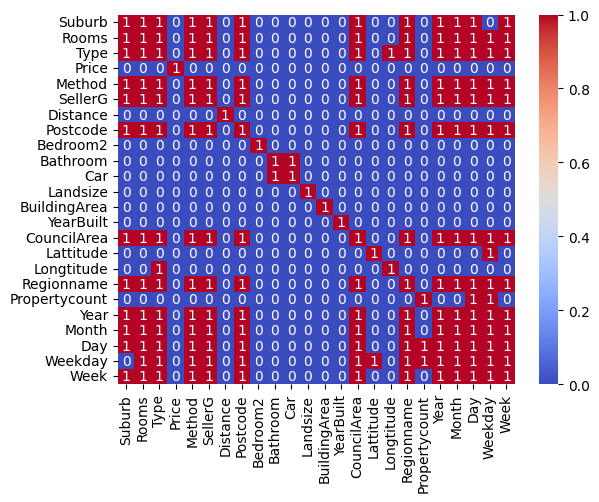

In [62]:
sns.heatmap(final_df,annot=True,cmap="coolwarm")